In [1]:
import numpy as np
import pandas as pd

# to produce verifiable outputs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


In [2]:
kc_housing = pd.read_csv("./datasets/king's_county_data/kc_house_data.csv")

In [3]:
kc_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
kc_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


### from Kaggle: waterfront, view, condition and grade are categorical ordinal. Extract the set of levels that these categories can take

In [5]:
cat_predictors = ["waterfront", "view", "condition", "grade"]

for predictor in cat_predictors:
    print(kc_housing[predictor].value_counts(), "\n")

0    21450
1      163
Name: waterfront, dtype: int64 

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64 

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64 

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64 



In [124]:
kc_housing.columns.difference(set(metadata).union(set(cat_predictors)))

Index(['bathrooms', 'bedrooms', 'date', 'floors', 'price', 'sqft_above',
       'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot',
       'sqft_lot15', 'yr_built', 'yr_renovated'],
      dtype='object')

In [161]:
# exclude "id", "lat", "long", "zipcode" as metadata
metadata = ["id"] 
location_data = ["lat", "long", "zipcode"]
date_data = ["date", "yr_built", "yr_renovated"]

selected_predictors = list(kc_housing.columns.difference(set(metadata + cat_predictors + location_data + date_data)))

kc_housing[selected_predictors].describe()

,bathrooms,bedrooms,floors,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000
mean,2.114757,3.370842,1.494309,5.400881e+05,1788.390691,291.509045,2079.899736,1986.552492,1.510697e+04,12768.455652
std,0.770163,0.930062,0.539989,3.671272e+05,828.090978,442.575043,918.440897,685.391304,4.142051e+04,27304.179631
min,0.000000,0.000000,1.000000,7.500000e+04,290.000000,0.000000,290.000000,399.000000,5.200000e+02,651.000000
25%,1.750000,3.000000,1.000000,3.219500e+05,1190.000000,0.000000,1427.000000,1490.000000,5.040000e+03,5100.000000
50%,2.250000,3.000000,1.500000,4.500000e+05,1560.000000,0.000000,1910.000000,1840.000000,7.618000e+03,7620.000000
75%,2.500000,4.000000,2.000000,6.450000e+05,2210.000000,560.000000,2550.000000,2360.000000,1.068800e+04,10083.000000
max,8.000000,33.000000,3.500000,7.700000e+06,9410.000000,4820.000000,13540.000000,6210.000000,1.651359e+06,871200.000000


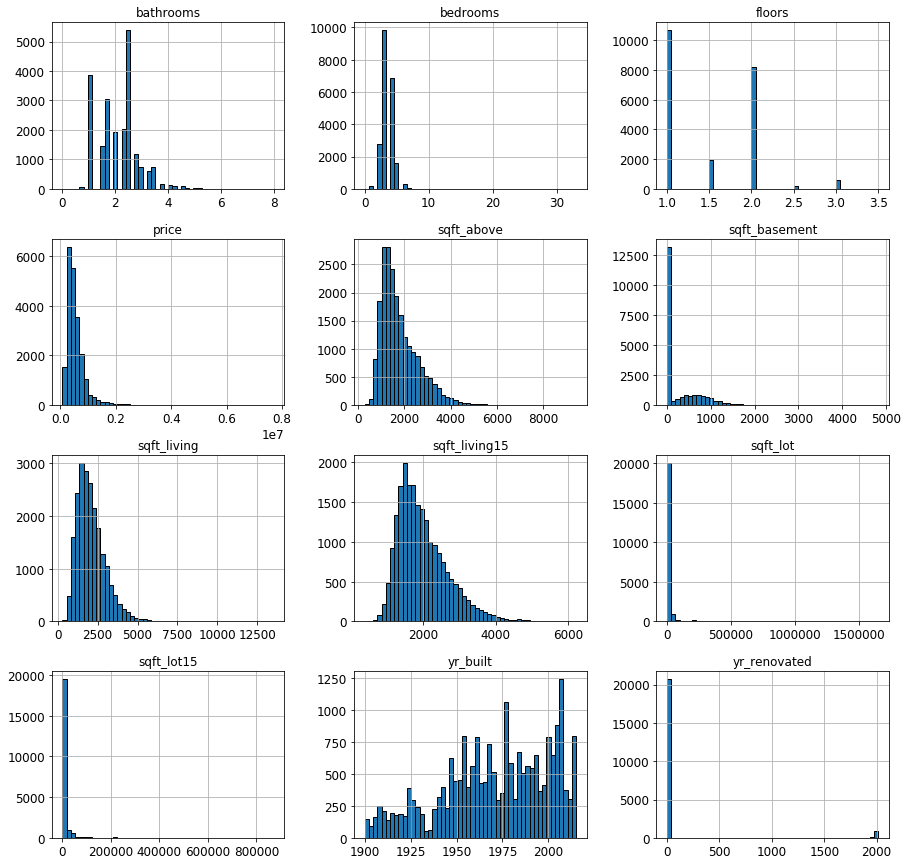

In [8]:
# exclude non-numerical columns from describe()
_ = np.r_[cat_predictors, ["id", "lat", "long", "zipcode", "date"]]
kc_housing.drop(_, axis=1).hist(figsize=(15,15), edgecolor="black", bins=50);

## From the histograms, the following predictors appear to have levels: yr_renovated

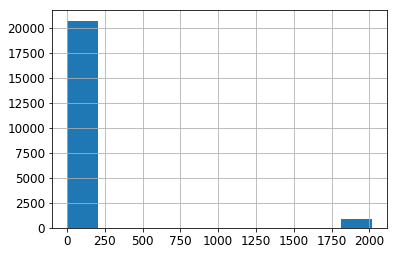

In [15]:
kc_housing["yr_renovated"].hist();

## Split data into train and test sets

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(kc_housing, test_size=0.2, random_state=42)

## Explore train_set

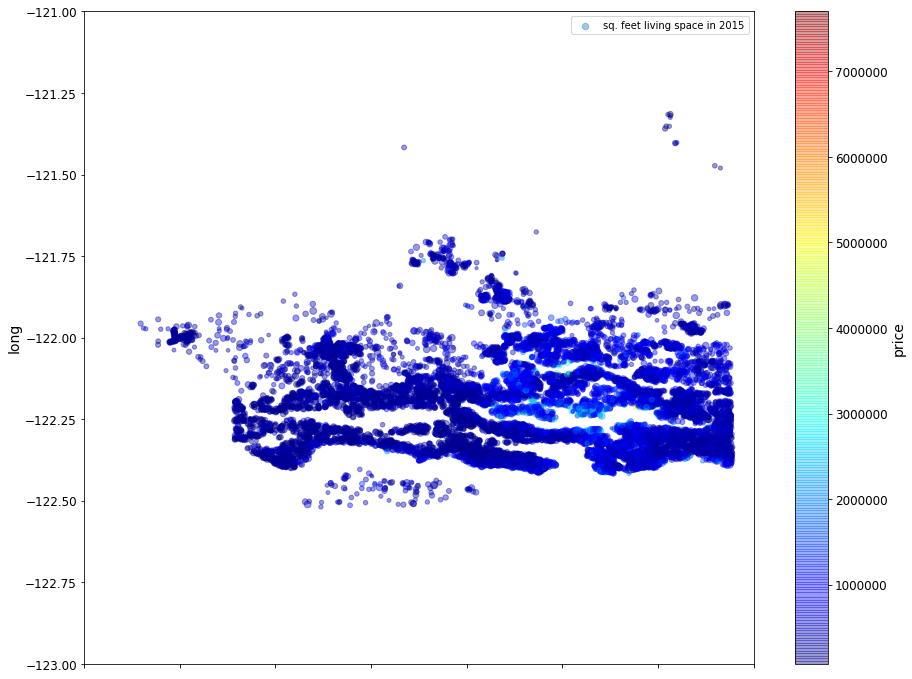

In [43]:
# visualize geographical data using lat and long predictors and colormap


train_set.plot(kind="scatter", x="lat", y="long", alpha=0.4, s=kc_housing["sqft_living15"]/80,
               label="sq. feet living space in 2015", figsize=(15,12), 
               c="price", cmap=plt.get_cmap("jet"), colorbar=True,
               )
plt.ylim(-123, -121)
plt.xlim(47.1, 47.8)
plt.legend;

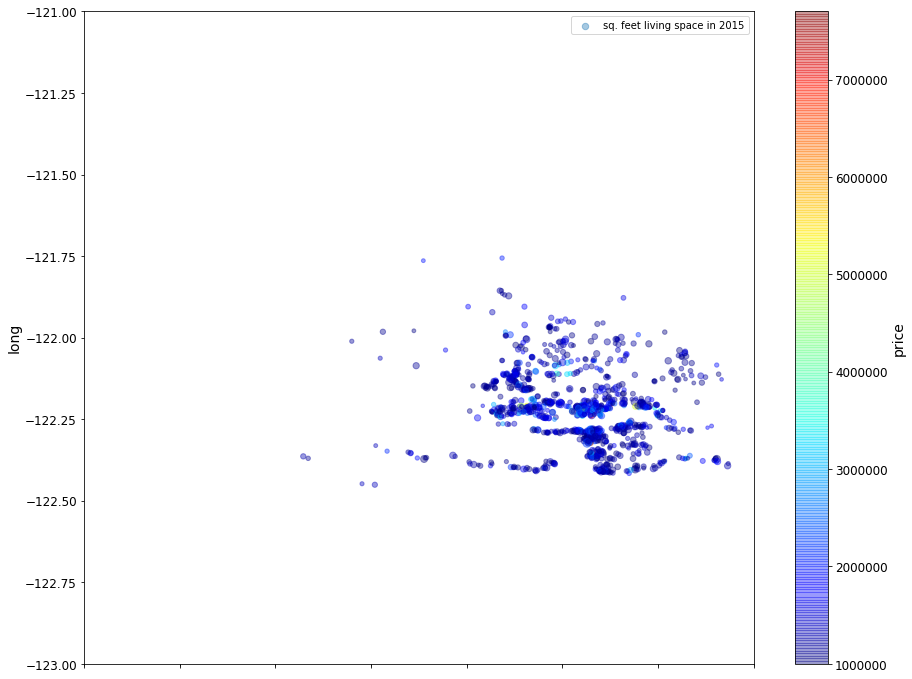

In [45]:
# include only premium house sales (>$ 1.5 million)
train_set.where(train_set["price"] >= 1E6).dropna().plot(kind="scatter", x="lat", y="long", alpha=0.4, s=kc_housing["sqft_living15"]/80,
               label="sq. feet living space in 2015", figsize=(15,12), 
               c="price", cmap=plt.get_cmap("jet"), colorbar=True,
               )
plt.ylim(-123, -121)
plt.xlim(47.1, 47.8)
plt.legend;

In [42]:
train_set["lat"].describe()

count    17290.000000
mean        47.560330
std          0.138432
min         47.159300
25%         47.472000
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

In [47]:
corr_matrix = train_set.corr()

In [51]:
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701701
grade            0.665093
sqft_above       0.603255
sqft_living15    0.582667
bathrooms        0.526618
view             0.392108
sqft_basement    0.321387
lat              0.310770
bedrooms         0.308262
floors           0.253425
waterfront       0.252946
yr_renovated     0.127737
sqft_lot         0.091039
sqft_lot15       0.079152
yr_built         0.049100
condition        0.036344
long             0.023486
id              -0.020623
zipcode         -0.053803
Name: price, dtype: float64

## Create custom transformers

## was the house renovated before or after sales?                                                                   price per living square feet of each house?

In [233]:
# transformer to convert sale date str to sale year. If sale year is after renovation year, renovation is set = 1

from sklearn.base import BaseEstimator, TransformerMixin

id_ix, date_ix, price_ix, sqft_living_ix, yr_renovated_ix = 0, 1, 2, 5, 15

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_price_per_sqft=True):
        self.add_price_per_sqft = add_price_per_sqft
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        renovated_prior = (pd.to_datetime(X.iloc[:, date_ix]).dt.year > X.iloc[:, yr_renovated_ix]).astype(int)
        X.loc[:, "renovated_prior"] = renovated_prior
        if self.add_price_per_sqft:
            price_per_sqft = X.iloc[:, price_ix] / X.iloc[:, sqft_living_ix]
            #X = np.delete(X, 1, 0)
            #return np.c_[X, renovated_prior, price_per_sqft]
            X.loc[:, "price_per_sqft"] = price_per_sqft
            return X
        else:
            #X = np.delete(X, 1, 0)
            #return np.c_[X, renovated_prior]
            return X

In [234]:
#test_set.columns.get_loc("sqft_living")

In [253]:
class DataSelector(BaseEstimator, TransformerMixin):
    def __init__(self, subset_to_remove=None):
        self.subset_to_remove = subset_to_remove
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if not self.subset_to_remove:
            return X.values
        else:
            return X.loc[:,X.columns.difference(self.subset_to_remove)].values

## Create a pipeline

In [254]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('attribute_adder', CombinedAttributeAdder()),
    ('data_selector', DataSelector(["id", "date", "zipcode"])),
    ('std_scaler', StandardScaler()),
])

## Prepared housing data

In [257]:
train_set_predictors = train_set.drop("price", axis=1)
train_set_labels = train_set["price"]
prepared_train_set = num_pipeline.fit_transform(train_set_predictors)

## Select and train models

### LinearRegression

In [260]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(prepared_train_set, train_set_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [264]:
from sklearn.metrics import mean_squared_error

lin_predictions = lin_reg.predict(prepared_train_set)
lin_mse = mean_squared_error(train_set_labels, lin_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

198472.4736562864

### DecisionTreeRegressor

In [265]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(prepared_train_set, train_set_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [266]:
tree_predictions = tree_reg.predict(prepared_train_set)
tree_mse = mean_squared_error(train_set_labels, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

9992.4019135292874

### RandomForestRegressor

In [268]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(prepared_train_set, train_set_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [269]:
forest_predictions = forest_reg.predict(prepared_train_set)
forest_mse = mean_squared_error(train_set_labels, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

56254.886934446215

### SVR

In [276]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(prepared_train_set, train_set_labels)
svm_predictions = svm_reg.predict(prepared_train_set)
svm_mse = mean_squared_error(train_set_labels, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

342775.25355222763

## Cross-Validation

### LinearRegression

In [272]:
def display_cross_val_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### DecisionTreeRegressor

In [274]:
from sklearn.model_selection import cross_val_score

tree_nmse = cross_val_score(tree_reg, prepared_train_set, train_set_labels,
                             scoring="neg_mean_squared_error", cv=10)
tree_rmse = np.sqrt(-tree_nmse)
display_cross_val_scores(tree_rmse)

Scores: [ 171519.56845978  221048.08728479  171974.25840722  171839.52615165
  175416.08420005  183577.58429667  181367.62393616  178745.44241209
  191986.90962175  164421.34919286]
Mean: 181189.643396
Standard deviation: 15157.0201655


### RandomForestRegressor

In [275]:
forest_nmse = cross_val_score(forest_reg, prepared_train_set, train_set_labels,
                             scoring="neg_mean_squared_error", cv=10)
forest_rmse = np.sqrt(-forest_nmse)
display_cross_val_scores(forest_rmse)

Scores: [ 132213.48341285  157417.7987612   130507.08520172  139460.84751478
  132142.50916288  140861.75290703  126014.77320446  127215.21006191
  132382.98768319  126032.69088011]
Mean: 134424.913879
Standard deviation: 9045.57693986


## GridSearchCV